In [69]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Ex 4/ 7.3

In [42]:
def test_reg_lin(d):
    X = np.random.rand(100,d)
    col1 = np.ones((100,1))
    X = np.concatenate(   (col1, X), axis=1)
    Y = np.random.rand(100,1 )
    debut = time.time()
    a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    duree = time.time() - debut
    return duree

In [48]:
durees = []
dimensions = range(100,5000,100)
for d in dimensions:
    durees.append( test_reg_lin(d) )
print(durees)

[0.0006844997406005859, 0.0010311603546142578, 0.006634950637817383, 0.00887918472290039, 0.01955890655517578, 0.023357152938842773, 0.02353215217590332, 0.03271675109863281, 0.045627593994140625, 0.06350970268249512, 0.08223628997802734, 0.10907959938049316, 0.12970185279846191, 0.15563058853149414, 0.20399093627929688, 0.2521986961364746, 0.2907226085662842, 0.34002137184143066, 0.3978447914123535, 0.45891642570495605, 0.5326364040374756, 0.6038985252380371, 0.6848199367523193, 0.7700023651123047, 0.8608074188232422, 0.9518444538116455, 1.062091588973999, 1.174393653869629, 1.306480884552002, 1.434192180633545, 1.575423002243042, 1.773155927658081, 1.8581678867340088, 2.012524366378784, 2.199533462524414, 2.376040458679199, 2.665196657180786, 3.000101327896118, 3.1494545936584473, 3.3849480152130127, 3.5738298892974854, 3.7874226570129395, 4.000653028488159, 4.380621671676636, 4.655105352401733, 4.847900390625, 5.14140772819519, 5.555249214172363, 5.864054441452026]


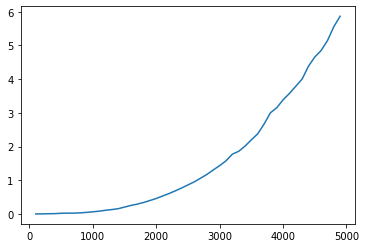

In [49]:
plt.plot(dimensions, durees)
plt.show()

In [61]:
#approximation de cette courbe avec une droite
dimensions2D = np.array(dimensions).reshape(-1,1)
durees2D = np.array(durees).reshape(-1,1)
linreg = LinearRegression()
linreg.fit(dimensions2D,durees2D)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
print(linreg.coef_, linreg.intercept_ )

[[0.00113436]] [-1.24757491]


In [71]:
mean_squared_error(   linreg.predict(dimensions2D)   , durees2D)

0.4267596391456096

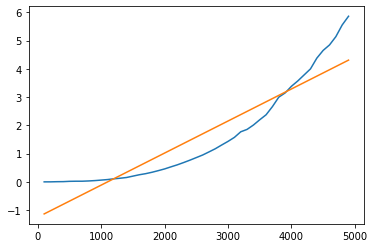

In [72]:
plt.plot(dimensions, durees)
plt.plot(dimensions, linreg.predict(dimensions2D))
plt.show()

In [78]:
#on ajoute à dimensions2D une nouvelle colonne qui contient les carrés des valeurs
dimensions2D_quad = np.concatenate( (dimensions2D, dimensions2D**2), axis=1) 
linreg.fit(dimensions2D_quad,durees2D)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
print(linreg.coef_, linreg.intercept_ )
mean_squared_error(   linreg.predict(dimensions2D_quad)   , durees2D)

[[-6.72863442e-04  3.61444530e-07]] [0.28856435]


0.009227332781678893

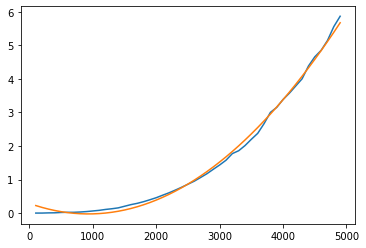

In [81]:
plt.plot(dimensions, durees)
plt.plot(dimensions, linreg.predict(dimensions2D_quad))
plt.show()

In [58]:
#SKLEARN ira beaucoup plus vite
linreg = LinearRegression()
#generer donnees avec d = 50000
d = 100000
X = np.random.rand(100,d)
Y = np.random.rand(100,1)

In [59]:
linreg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)